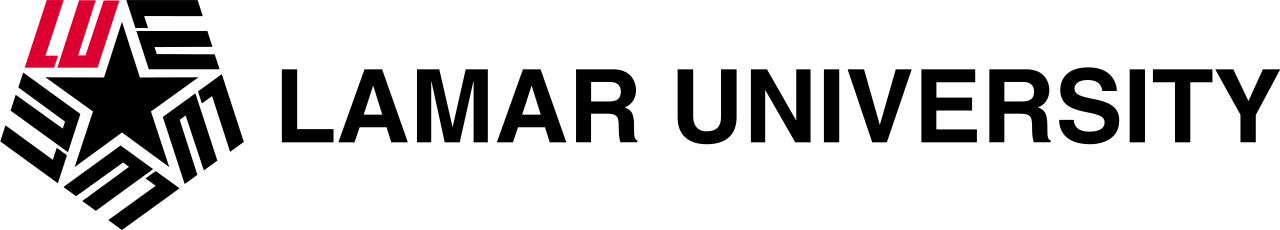

<h2>Problem Statement</h2>
<h3>Roads and Transportation Network in SouthEast Texas</h3>

<h3>Nimesh Devrajbhai Dhameliya</h3>

<h3>Avinash Sai Anumolu</h3>

<h3>Madhu Gojjala</h3>

<h3>Guided by: Dr. Venkatesh Uddameri</h3>

Importing libraries

In [1]:
import pandas as pd  #import library
import numpy as np
import geopandas as pgd
import os
import sqlite3

SouthEast Texas County

In [ ]:
os.chdir('C:\\Users\\nimes\\Desktop\\Project 2\\Data') #set directory
county = pgd.read_file('SouthEastTexasCounty.shp') #read file
county.plot(figsize=(10,10)) #plot of county
#county.crs #projection system

<AxesSubplot:>

importing CSV file

In [3]:
os.chdir('C:\\Users\\nimes\\Desktop\\Project 2\\Data')    #read csv file
roads = pd.read_csv('SouthEastTexasRoads.csv',low_memory=False)   #due to big data low memory = false
roads

,Unnamed: 0,RTE_GRID,RTE_PRFX,RTE_NBR,RDBD_TYPE,RDWAY_STAT,FUNC_SYS,MAP_LBL,geometry,index_right,DPS_CNTY_N,FIPS_ST_CN,CNTY_NM
0,483732,154765,US,59,Single Roadbed,Open to Traffic,3,59,LINESTRING (-94.81007356037837 31.132926746864...,46,204,48407,San Jacinto
1,138000,75412,CR,3624,Single Roadbed,Open to Traffic,7,NEWPORT WAY,LINESTRING (-95.25429298599994 30.861818605000...,46,204,48407,San Jacinto
2,138049,75393,CR,3623,Single Roadbed,Open to Traffic,7,MONACO WAY,LINESTRING (-95.25445581499997 30.863026625000...,46,204,48407,San Jacinto
3,164724,75331,CR,3620,Single Roadbed,Open to Traffic,7,ADMIRALTY WAY,LINESTRING (-95.25438380599996 30.861280055000...,46,204,48407,San Jacinto
4,137637,75374,CR,3622,Single Roadbed,Open to Traffic,7,NAPLES WAY,LINESTRING (-95.25542398599998 30.864497856000...,46,204,48407,San Jacinto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97952,202196,199935,CS,1024414,Single Roadbed,Open to Traffic,7,HARBOUR LN,LINESTRING (-94.87085682199995 29.679432087000...,12,36,48071,Chambers
97953,202601,199938,CS,1024417,Single Roadbed,Open to Traffic,7,HURST RD,LINESTRING (-94.87023964199994 29.682000998000...,12,36,48071,Chambers
97954,178633,157089,FD,702299,Single Roadbed,Proposed,7,ALICE JACKSON WHITE ACCESS RD,LINESTRING (-94.56788521899995 29.573504886000...,12,36,48071,Chambers
97955,177783,157090,FD,702300,Single Roadbed,Proposed,7,ALICE JACKSON WHITE ACCESS RD,LINESTRING (-94.57088524999995 29.583438267000...,12,36,48071,Chambers


In [4]:
os.chdir('C:\\Users\\nimes\\Desktop\\Project 2\\Data\\Shape')
airports = pd.read_csv('SouthEastTexasAirports.csv')
airports

,Unnamed: 0,name,ftype,fcode,faa_airpor,gnis_id,geometry,index_right,DPS_CNTY_N,FIPS_ST_CN,CNTY_NM
0,2687,Wildwood Airport,200,20000,XA91,2676603.0,POINT (-94.43821740343668 30.53849078176478),56,229,48457,Tyler
1,2675,Tyler County Airport,200,20000,09R,1387769.0,POINT (-94.45967217215338 30.774172091815615),56,229,48457,Tyler
2,2656,16/34,201,20100,09R,NaN,POINT (-94.45879701277977 30.77500014389767),56,229,48457,Tyler
3,2635,Tyler County Hospital Heliport,200,20001,TE19,NaN,POINT (-94.42850625761844 30.77620507097913),56,229,48457,Tyler
4,2657,18/36,201,20100,XA91,NaN,POINT (-94.43801514927031 30.53448614843768),56,229,48457,Tyler
...,...,...,...,...,...,...,...,...,...,...,...
262,2554,Huntsville Memorial Hospital Heliport,200,20001,TE03,NaN,POINT (-95.55794675065698 30.69820694505853),52,236,48471,Walker
263,2575,Huntsville Municipal Airport,200,20000,UTS,1383448.0,POINT (-95.58662242873748 30.743500822071553),52,236,48471,Walker
264,2570,18/36,201,20100,UTS,NaN,POINT (-95.58715002873663 30.74688001894134),52,236,48471,Walker
265,2612,Raven's Nest Airport,200,20000,57TS,2770208.0,POINT (-95.54216586734816 30.794998951158334),52,236,48471,Walker


In [5]:
os.chdir('C:\\Users\\nimes\\Desktop\\Project 2\\Data\\Texas_Railroads')
rails = pd.read_csv('SouthEastTexasRailways.csv')
rails

,Unnamed: 0,RR_ABRVN,RR_COMPANY,RR_STATUS,RR_NBR,geometry,index_right,DPS_CNTY_N,FIPS_ST_CN,CNTY_NM
0,2879,BNSF,BNSF Railway Company,Active,15.0,LINESTRING (-93.95135299199995 30.452658143000...,58,121,48241,Jasper
1,2880,BNSF,BNSF Railway Company,Active,15.0,LINESTRING (-93.95079898799997 30.453050785000...,58,121,48241,Jasper
2,2878,TIBR,Timberrock Railroad Company,Active,1.0,LINESTRING (-93.94905674699999 30.464874611000...,58,121,48241,Jasper
3,2877,BNSF,BNSF Railway Company,Active,15.0,LINESTRING (-93.92639489799996 30.535901102000...,58,121,48241,Jasper
4,2876,BNSF,BNSF Railway Company,Active,15.0,LINESTRING (-93.90624379699995 30.598982635000...,58,121,48241,Jasper
...,...,...,...,...,...,...,...,...,...,...
2795,4328,NaN,NaN,Unknown,NaN,LINESTRING (-95.50101761399998 30.705673172000...,52,236,48471,Walker
2796,4139,NaN,NaN,Inactive/Abandoned,NaN,LINESTRING (-95.54194365399997 30.716721441000...,52,236,48471,Walker
2797,4364,NaN,NaN,Pulled,NaN,LINESTRING (-95.54657652899994 30.718473857000...,52,236,48471,Walker
2798,5881,NaN,NaN,Inactive/Abandoned,NaN,LINESTRING (-95.54632913299997 30.721083263000...,52,236,48471,Walker


sqlite3 part

In [6]:
connection = sqlite3.connect('C:\\Users\\nimes\\Desktop\\Project 2\\Data\\TXSE\\TXSE.db')  #create database to connect sql query
#cur = connection.cursor()  #make a connection to TXSE using curser

In [7]:
connection.execute('PRAGMA foreign_keys = ON')

In [8]:
#cur.execute("""drop table roads""")  #drop the table

In [9]:
roads.to_sql('roads',connection,if_exists='replace',index=False)#connecting to TXSE database

97957

In [10]:
airports.to_sql('airports',connection,if_exists='replace',index=False)

267

In [11]:
rails.to_sql('railway',connection,if_exists='replace',index=False)

2800

In [12]:
connection.commit()  #end connection

In [13]:
cur = connection.cursor()   #define cursor to execute query 

<h2>Roadway Data</h2>

In [15]:
cur.execute("""drop table r1""")  #drop table
cur.execute("""drop table r2""")

In [16]:
c2 = """CREATE TABLE r1 (                
ID INTEGER AUTO_INCREMENT PRIMARY KEY,
RTE_GRID integer,
RDBD_TYPE text,
CNTY_NM text,
RTE_NBR integer,
geometry geometry
);"""
cur.execute(c2)                #relational data table 1 , auto increment, primary key

In [17]:
cur.execute("""CREATE TABLE r2 (
UID INTEGER AUTO_INCREMENT PRIMARY KEY,
ID INTEGER,
RDWAY_STAT text,
FIPS_ST_CN INTEGER,
FUNC_SYS INTEGER,
FOREIGN KEY(ID) REFERENCES r1(ID) 
);""")                     #relational data table 2 , foreign key from table 1 

In [18]:
cur.execute("""INSERT INTO r1(RTE_GRID, RDBD_TYPE, CNTY_NM, RTE_NBR, geometry)
SELECT RTE_GRID, RDBD_TYPE, CNTY_NM, RTE_NBR, geometry FROM roads;""")
cur.execute("""INSERT INTO r2(RDWAY_STAT, FIPS_ST_CN, FUNC_SYS)
SELECT RDWAY_STAT, FIPS_ST_CN, FUNC_SYS FROM roads;""")

#connection.commit()              #insert data from roads 

In [19]:
for row in cur.execute('SELECT geometry, RDBD_TYPE FROM r1 group by RDBD_TYPE and CNTY_NM'):
    print(row)   #execute query

('LINESTRING (-94.81007356037837 31.132926746864385, -94.81047538499996 31.131067035000058, -94.81058557499995 31.130590425000037, -94.81065405499999 31.13010695500003, -94.81071155499995 31.12982477500003, -94.81072312499998 31.129282105000073, -94.81080770499995 31.127842335000025, -94.81087847399999 31.125230375000058, -94.81174558299995 31.103935489000037, -94.81179315299994 31.103356810000037, -94.81189221399995 31.10280608900007, -94.81200898399999 31.10224598900004, -94.81211929399996 31.101697099000035, -94.81227106399996 31.101125180000054, -94.81397269299998 31.095685528000047, -94.81403765299996 31.095470178000028, -94.81498905399997 31.092412078000052, -94.81684331399998 31.086484506000033, -94.82004150399996 31.076326704000053, -94.82391116399998 31.06392961100005, -94.82520209499995 31.059734551000076, -94.82539682499998 31.058978060000072, -94.82547262499997 31.05843868000005, -94.82554577399998 31.057900060000065, -94.82560078499995 31.057354349000036, -94.8256402349999

In [20]:
result_road = pd.read_sql('SELECT geometry, RDBD_TYPE FROM r1 group by CNTY_NM',connection)

In [21]:
connection.commit()

In [22]:
result_road['geometry'] = pgd.GeoSeries.from_wkt(result_road['geometry'])

In [23]:
road_result = pgd.GeoDataFrame(result_road)
road_result

,geometry,RDBD_TYPE
0,"LINESTRING (-95.22817 30.12969, -95.21940 30.1...",Single Roadbed
1,"MULTILINESTRING ((-94.83338 29.28914, -94.8346...",Left Roadbed
2,"LINESTRING (-93.98478 31.14440, -93.98518 31.1...",Single Roadbed
3,"MULTILINESTRING ((-94.83338 29.28914, -94.8346...",Left Roadbed
4,"LINESTRING (-93.99468 31.12710, -93.99392 31.1...",Single Roadbed
5,"LINESTRING (-94.19256 30.22089, -94.19242 30.2...",Left Frontage
6,"LINESTRING (-94.81007 31.13293, -94.81048 31.1...",Single Roadbed
7,"MULTILINESTRING ((-94.83338 29.28914, -94.8346...",Left Roadbed
8,"LINESTRING (-93.75170 31.16749, -93.75173 31.1...",Single Roadbed
9,"LINESTRING (-94.00605 30.23268, -94.00603 30.2...",Single Roadbed


<AxesSubplot:>

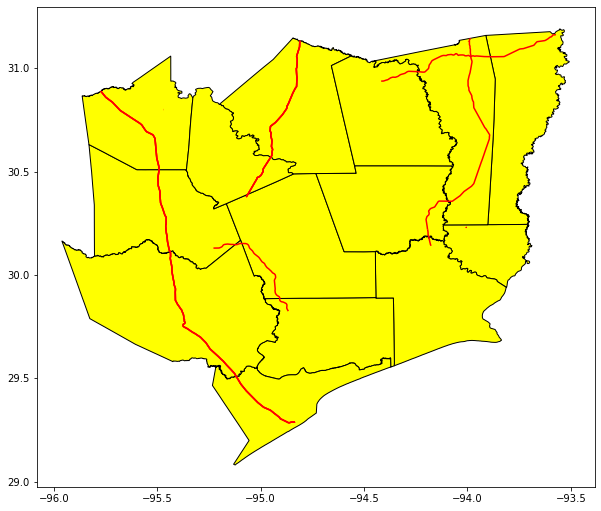

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
county.plot(ax=ax,color='yellow',edgecolor='black')
road_result.plot(ax=ax,color='r')

<h2>relational Airport data</h2>

In [ ]:
cur.execute("""drop table a1""")
cur.execute("""drop table a2""")

In [25]:
cur.execute("""CREATE TABLE a1 (
ID INTEGER AUTO_INCREMENT PRIMARY KEY,
fcode integer,
faa_airpor char(40),
gnis_id integer,
CNTY_NM text,
geometry geometry
);"""
)

In [26]:
cur.execute("""CREATE TABLE a2 (
UID INTEGER AUTO_INCREMENT PRIMARY KEY,
ID INTEGER,
name char(40),
FIPS_ST_CN INTEGER,
ftype INTEGER,
FOREIGN KEY(ID) REFERENCES a1(ID) 
);""")

In [27]:
cur.execute("""INSERT INTO a1(fcode, faa_airpor, gnis_id, CNTY_NM, geometry)
SELECT fcode, faa_airpor, gnis_id, CNTY_NM, geometry FROM airports;""")
cur.execute("""INSERT INTO a2(name, FIPS_ST_CN, ftype)
SELECT name, FIPS_ST_CN, ftype FROM airports;""")

In [28]:
for row in connection.execute('SELECT geometry, fcode, faa_airpor, gnis_id, CNTY_NM FROM a1,a2 where fcode = 20000 '):
    print(row)

('POINT (-95.02155202753124 30.68907825340608)', 20000, '00R', 1387089, 'Polk')
('POINT (-95.03009715251795 30.31365623211377)', 20000, '06TE', 1386387, 'Liberty')
('POINT (-95.81289002838628 30.05755002001132)', 20000, '06TX', 2675755, 'Harris')
('POINT (-94.45967217215338 30.774172091815615)', 20000, '09R', 1387769, 'Tyler')
('POINT (-95.18633002935883 30.44187001941475)', 20000, '0TS5', 1386386, 'San Jacinto')
('POINT (-95.3598614436728 30.403517487182626)', 20000, '16XS', 2675770, 'Montgomery')
('POINT (-94.674244722862 29.67060922998695)', 20000, '1TS0', 1387257, 'Chambers')
('POINT (-95.04958887436271 29.93844642332118)', 20000, '1XS1', 2675785, 'Harris')
('POINT (-94.96827022448895 29.836995285978674)', 20000, '25TA', 1386217, 'Harris')
('POINT (-95.61244293494741 30.332816351875692)', 20000, '33TA', 1387215, 'Montgomery')
('POINT (-95.53991414339333 30.391405641368124)', 20000, '34XS', 2675811, 'Montgomery')
('POINT (-95.0094894327583 29.359163556511987)', 20000, '37TE', 138682

('POINT (-94.03610768635264 30.891602142674913)', 20000, 'JAS', 1384812, 'Jasper')
('POINT (-93.79729149088985 30.070345462699777)', 20000, 'ORG', 1387266, 'Orange')
('POINT (-94.66164051767322 29.77119579545581)', 20000, 'T00', 1386152, 'Chambers')
('POINT (-93.91356357612608 30.643957449309426)', 20000, 'T12', 1387024, 'Jasper')
('POINT (-95.06424933788162 29.66663507686809)', 20000, 'T41', 1387051, 'Harris')
('POINT (-95.66742356611206 30.04273637732598)', 20000, 'T51', 1386841, 'Harris')
('POINT (-94.6973606863678 30.077732998104977)', 20000, 'T78', 1387081, 'Liberty')
('POINT (-94.42914130032585 29.819190637047825)', 20000, 'T90', 1384844, 'Chambers')
('POINT (-94.96900264219613 30.00721079613112)', 20000, 'TA07', 1386511, 'Liberty')
('POINT (-95.86166498143552 30.102771648066096)', 20000, 'TA12', None, 'Harris')
('POINT (-94.85271362883498 31.04506274660349)', 20000, 'TA43', 2675934, 'Polk')
('POINT (-94.91193432040973 30.59368504105413)', 20000, 'TE38', 1386741, 'Polk')
('POINT 

('POINT (-94.71017726134801 30.157612228189237)', 20000, 'TT19', None, 'Liberty')
('POINT (-95.74611872224 30.43281590484537)', 20000, 'TT75', None, 'Montgomery')
('POINT (-95.58662242873748 30.743500822071553)', 20000, 'UTS', 1383448, 'Walker')
('POINT (-94.43821740343668 30.53849078176478)', 20000, 'XA91', 2676603, 'Tyler')
('POINT (-95.43573203001336 30.537332019266614)', 20000, 'XS09', 2676612, 'Walker')
('POINT (-94.39771896599956 30.03779092212534)', 20000, 'XS27', 1387250, 'Jefferson')
('POINT (-93.8622638824557 30.061297397088822)', 20000, 'XS33', 1387267, 'Orange')
('POINT (-94.70579048114638 30.045920307529343)', 20000, 'XS58', 1387382, 'Liberty')
('POINT (-94.83322371428187 30.47813102352518)', 20000, 'XS72', 1387421, 'Liberty')
('POINT (-94.62532471668794 29.463379344891905)', 20000, 'XS77', 1386462, 'Galveston')
('POINT (-94.9100450339543 30.470468948537075)', 20000, 'XS99', 1387537, 'San Jacinto')
('POINT (-95.02155202753124 30.68907825340608)', 20000, '00R', 1387089, 'Po

('POINT (-95.02155202753124 30.68907825340608)', 20000, '00R', 1387089, 'Polk')
('POINT (-95.03009715251795 30.31365623211377)', 20000, '06TE', 1386387, 'Liberty')
('POINT (-95.81289002838628 30.05755002001132)', 20000, '06TX', 2675755, 'Harris')
('POINT (-94.45967217215338 30.774172091815615)', 20000, '09R', 1387769, 'Tyler')
('POINT (-95.18633002935883 30.44187001941475)', 20000, '0TS5', 1386386, 'San Jacinto')
('POINT (-95.3598614436728 30.403517487182626)', 20000, '16XS', 2675770, 'Montgomery')
('POINT (-94.674244722862 29.67060922998695)', 20000, '1TS0', 1387257, 'Chambers')
('POINT (-95.04958887436271 29.93844642332118)', 20000, '1XS1', 2675785, 'Harris')
('POINT (-94.96827022448895 29.836995285978674)', 20000, '25TA', 1386217, 'Harris')
('POINT (-95.61244293494741 30.332816351875692)', 20000, '33TA', 1387215, 'Montgomery')
('POINT (-95.53991414339333 30.391405641368124)', 20000, '34XS', 2675811, 'Montgomery')
('POINT (-95.0094894327583 29.359163556511987)', 20000, '37TE', 138682

('POINT (-94.71017726134801 30.157612228189237)', 20000, 'TT19', None, 'Liberty')
('POINT (-95.74611872224 30.43281590484537)', 20000, 'TT75', None, 'Montgomery')
('POINT (-95.58662242873748 30.743500822071553)', 20000, 'UTS', 1383448, 'Walker')
('POINT (-94.43821740343668 30.53849078176478)', 20000, 'XA91', 2676603, 'Tyler')
('POINT (-95.43573203001336 30.537332019266614)', 20000, 'XS09', 2676612, 'Walker')
('POINT (-94.39771896599956 30.03779092212534)', 20000, 'XS27', 1387250, 'Jefferson')
('POINT (-93.8622638824557 30.061297397088822)', 20000, 'XS33', 1387267, 'Orange')
('POINT (-94.70579048114638 30.045920307529343)', 20000, 'XS58', 1387382, 'Liberty')
('POINT (-94.83322371428187 30.47813102352518)', 20000, 'XS72', 1387421, 'Liberty')
('POINT (-94.62532471668794 29.463379344891905)', 20000, 'XS77', 1386462, 'Galveston')
('POINT (-94.9100450339543 30.470468948537075)', 20000, 'XS99', 1387537, 'San Jacinto')
('POINT (-95.02155202753124 30.68907825340608)', 20000, '00R', 1387089, 'Po

('POINT (-95.74611872224 30.43281590484537)', 20000, 'TT75', None, 'Montgomery')
('POINT (-95.58662242873748 30.743500822071553)', 20000, 'UTS', 1383448, 'Walker')
('POINT (-94.43821740343668 30.53849078176478)', 20000, 'XA91', 2676603, 'Tyler')
('POINT (-95.43573203001336 30.537332019266614)', 20000, 'XS09', 2676612, 'Walker')
('POINT (-94.39771896599956 30.03779092212534)', 20000, 'XS27', 1387250, 'Jefferson')
('POINT (-93.8622638824557 30.061297397088822)', 20000, 'XS33', 1387267, 'Orange')
('POINT (-94.70579048114638 30.045920307529343)', 20000, 'XS58', 1387382, 'Liberty')
('POINT (-94.83322371428187 30.47813102352518)', 20000, 'XS72', 1387421, 'Liberty')
('POINT (-94.62532471668794 29.463379344891905)', 20000, 'XS77', 1386462, 'Galveston')
('POINT (-94.9100450339543 30.470468948537075)', 20000, 'XS99', 1387537, 'San Jacinto')
('POINT (-95.02155202753124 30.68907825340608)', 20000, '00R', 1387089, 'Polk')
('POINT (-95.03009715251795 30.31365623211377)', 20000, '06TE', 1386387, 'Lib

('POINT (-94.85271362883498 31.04506274660349)', 20000, 'TA43', 2675934, 'Polk')
('POINT (-94.91193432040973 30.59368504105413)', 20000, 'TE38', 1386741, 'Polk')
('POINT (-94.35230019419504 29.856931986989366)', 20000, 'TE73', 2675955, 'Jefferson')
('POINT (-95.66201788799543 30.3435857383173)', 20000, 'TE85', 2675964, 'Montgomery')
('POINT (-95.68596597129158 29.98570858574783)', 20000, 'TS07', 1386472, 'Harris')
('POINT (-94.97828402864008 30.056934177303958)', 20000, 'TS35', 2676539, 'Liberty')
('POINT (-94.99819276715084 29.415992669965476)', 20000, 'TS50', 1387635, 'Galveston')
('POINT (-94.71017726134801 30.157612228189237)', 20000, 'TT19', None, 'Liberty')
('POINT (-95.74611872224 30.43281590484537)', 20000, 'TT75', None, 'Montgomery')
('POINT (-95.58662242873748 30.743500822071553)', 20000, 'UTS', 1383448, 'Walker')
('POINT (-94.43821740343668 30.53849078176478)', 20000, 'XA91', 2676603, 'Tyler')
('POINT (-95.43573203001336 30.537332019266614)', 20000, 'XS09', 2676612, 'Walker'

('POINT (-95.16773702834598 29.60875330091625)', 20000, 'EFD', 1386848, 'Harris')
('POINT (-94.85725529341124 29.265398889990877)', 20000, 'GLS', 1386705, 'Galveston')
('POINT (-95.27723379275938 29.652399875848516)', 20000, 'HOU', 1386918, 'Harris')
('POINT (-94.95711962138125 29.78719836730596)', 20000, 'HPY', 1386210, 'Harris')
('POINT (-95.34211872390864 29.986866538871027)', 20000, 'IAH', 1386919, 'Harris')
('POINT (-95.67312109110321 29.816912365176506)', 20000, 'IWS', 1386894, 'Harris')
('POINT (-94.03610768635264 30.891602142674913)', 20000, 'JAS', 1384812, 'Jasper')
('POINT (-93.79729149088985 30.070345462699777)', 20000, 'ORG', 1387266, 'Orange')
('POINT (-94.66164051767322 29.77119579545581)', 20000, 'T00', 1386152, 'Chambers')
('POINT (-93.91356357612608 30.643957449309426)', 20000, 'T12', 1387024, 'Jasper')
('POINT (-95.06424933788162 29.66663507686809)', 20000, 'T41', 1387051, 'Harris')
('POINT (-95.66742356611206 30.04273637732598)', 20000, 'T51', 1386841, 'Harris')
('PO

('POINT (-95.55220762566591 30.065054560624674)', 20000, 'DWH', 1386922, 'Harris')
('POINT (-95.16773702834598 29.60875330091625)', 20000, 'EFD', 1386848, 'Harris')
('POINT (-94.85725529341124 29.265398889990877)', 20000, 'GLS', 1386705, 'Galveston')
('POINT (-95.27723379275938 29.652399875848516)', 20000, 'HOU', 1386918, 'Harris')
('POINT (-94.95711962138125 29.78719836730596)', 20000, 'HPY', 1386210, 'Harris')
('POINT (-95.34211872390864 29.986866538871027)', 20000, 'IAH', 1386919, 'Harris')
('POINT (-95.67312109110321 29.816912365176506)', 20000, 'IWS', 1386894, 'Harris')
('POINT (-94.03610768635264 30.891602142674913)', 20000, 'JAS', 1384812, 'Jasper')
('POINT (-93.79729149088985 30.070345462699777)', 20000, 'ORG', 1387266, 'Orange')
('POINT (-94.66164051767322 29.77119579545581)', 20000, 'T00', 1386152, 'Chambers')
('POINT (-93.91356357612608 30.643957449309426)', 20000, 'T12', 1387024, 'Jasper')
('POINT (-95.06424933788162 29.66663507686809)', 20000, 'T41', 1387051, 'Harris')
('P

('POINT (-94.99819276715084 29.415992669965476)', 20000, 'TS50', 1387635, 'Galveston')
('POINT (-94.71017726134801 30.157612228189237)', 20000, 'TT19', None, 'Liberty')
('POINT (-95.74611872224 30.43281590484537)', 20000, 'TT75', None, 'Montgomery')
('POINT (-95.58662242873748 30.743500822071553)', 20000, 'UTS', 1383448, 'Walker')
('POINT (-94.43821740343668 30.53849078176478)', 20000, 'XA91', 2676603, 'Tyler')
('POINT (-95.43573203001336 30.537332019266614)', 20000, 'XS09', 2676612, 'Walker')
('POINT (-94.39771896599956 30.03779092212534)', 20000, 'XS27', 1387250, 'Jefferson')
('POINT (-93.8622638824557 30.061297397088822)', 20000, 'XS33', 1387267, 'Orange')
('POINT (-94.70579048114638 30.045920307529343)', 20000, 'XS58', 1387382, 'Liberty')
('POINT (-94.83322371428187 30.47813102352518)', 20000, 'XS72', 1387421, 'Liberty')
('POINT (-94.62532471668794 29.463379344891905)', 20000, 'XS77', 1386462, 'Galveston')
('POINT (-94.9100450339543 30.470468948537075)', 20000, 'XS99', 1387537, 'Sa

('POINT (-94.51474541685957 29.829553345365184)', 20000, '77XA', 2770666, 'Chambers')
('POINT (-95.65114489738733 30.089915217877717)', 20000, '7TA0', 1387647, 'Harris')
('POINT (-94.20868657358466 29.915616190023286)', 20000, '7TE0', 1386627, 'Jefferson')
('POINT (-95.17549002937562 29.5046800208695)', 20000, '7XS0', 1386698, 'Galveston')
('POINT (-95.53942729651908 30.480522544354756)', 20000, '97TS', 1384843, 'Montgomery')
('POINT (-94.98673128800198 29.874122613004374)', 20000, '9TA3', 1386454, 'Harris')
('POINT (-94.21554003086567 30.07044001999128)', 20000, 'BMT', 1386223, 'Jefferson')
('POINT (-94.0214752530419 29.95497028267056)', 20000, 'BPT', 1386230, 'Jefferson')
('POINT (-95.41903859358104 30.352543858094975)', 20000, 'CXO', 1386415, 'Montgomery')
('POINT (-95.55220762566591 30.065054560624674)', 20000, 'DWH', 1386922, 'Harris')
('POINT (-95.16773702834598 29.60875330091625)', 20000, 'EFD', 1386848, 'Harris')
('POINT (-94.85725529341124 29.265398889990877)', 20000, 'GLS', 1

('POINT (-95.3598614436728 30.403517487182626)', 20000, '16XS', 2675770, 'Montgomery')
('POINT (-94.674244722862 29.67060922998695)', 20000, '1TS0', 1387257, 'Chambers')
('POINT (-95.04958887436271 29.93844642332118)', 20000, '1XS1', 2675785, 'Harris')
('POINT (-94.96827022448895 29.836995285978674)', 20000, '25TA', 1386217, 'Harris')
('POINT (-95.61244293494741 30.332816351875692)', 20000, '33TA', 1387215, 'Montgomery')
('POINT (-95.53991414339333 30.391405641368124)', 20000, '34XS', 2675811, 'Montgomery')
('POINT (-95.0094894327583 29.359163556511987)', 20000, '37TE', 1386821, 'Galveston')
('POINT (-94.90437002979644 29.951610020175735)', 20000, '3TE1', 1384202, 'Liberty')
('POINT (-94.95984874846033 30.102340958483467)', 20000, '3TE9', 1386516, 'Liberty')
('POINT (-95.05992059830504 29.324044179483167)', 20000, '3TX4', 2770664, 'Galveston')
('POINT (-95.23367488970206 30.457444485015515)', 20000, '42TT', None, 'San Jacinto')
('POINT (-94.25833952975756 30.338338766450477)', 20000, '

('POINT (-95.68596597129158 29.98570858574783)', 20000, 'TS07', 1386472, 'Harris')
('POINT (-94.97828402864008 30.056934177303958)', 20000, 'TS35', 2676539, 'Liberty')
('POINT (-94.99819276715084 29.415992669965476)', 20000, 'TS50', 1387635, 'Galveston')
('POINT (-94.71017726134801 30.157612228189237)', 20000, 'TT19', None, 'Liberty')
('POINT (-95.74611872224 30.43281590484537)', 20000, 'TT75', None, 'Montgomery')
('POINT (-95.58662242873748 30.743500822071553)', 20000, 'UTS', 1383448, 'Walker')
('POINT (-94.43821740343668 30.53849078176478)', 20000, 'XA91', 2676603, 'Tyler')
('POINT (-95.43573203001336 30.537332019266614)', 20000, 'XS09', 2676612, 'Walker')
('POINT (-94.39771896599956 30.03779092212534)', 20000, 'XS27', 1387250, 'Jefferson')
('POINT (-93.8622638824557 30.061297397088822)', 20000, 'XS33', 1387267, 'Orange')
('POINT (-94.70579048114638 30.045920307529343)', 20000, 'XS58', 1387382, 'Liberty')
('POINT (-94.83322371428187 30.47813102352518)', 20000, 'XS72', 1387421, 'Liber

In [29]:
result_air = pd.read_sql('SELECT geometry, fcode, faa_airpor, gnis_id, CNTY_NM, FIPS_ST_CN FROM a1, a2 group by gnis_id',connection)
cur.fetchall()

[]

In [30]:
connection.commit()

In [31]:
result_air['geometry'] = pgd.GeoSeries.from_wkt(result_air['geometry'])

In [32]:
air_result = pgd.GeoDataFrame(result_air)
air_result

,geometry,fcode,faa_airpor,gnis_id,CNTY_NM,FIPS_ST_CN
0,POINT (-94.45880 30.77500),20100,09R,NaN,Tyler,48457
1,POINT (-95.58662 30.74350),20000,UTS,1383448.0,Walker,48457
2,POINT (-94.90437 29.95161),20000,3TE1,1384202.0,Liberty,48457
3,POINT (-94.03611 30.89160),20000,JAS,1384812.0,Jasper,48457
4,POINT (-95.53943 30.48052),20000,97TS,1384843.0,Montgomery,48457
...,...,...,...,...,...,...
64,POINT (-95.43573 30.53733),20000,XS09,2676612.0,Walker,48457
65,POINT (-95.54217 30.79500),20000,57TS,2770208.0,Walker,48457
66,POINT (-95.05992 29.32404),20000,3TX4,2770664.0,Galveston,48457
67,POINT (-94.51475 29.82955),20000,77XA,2770666.0,Chambers,48457


<AxesSubplot:>

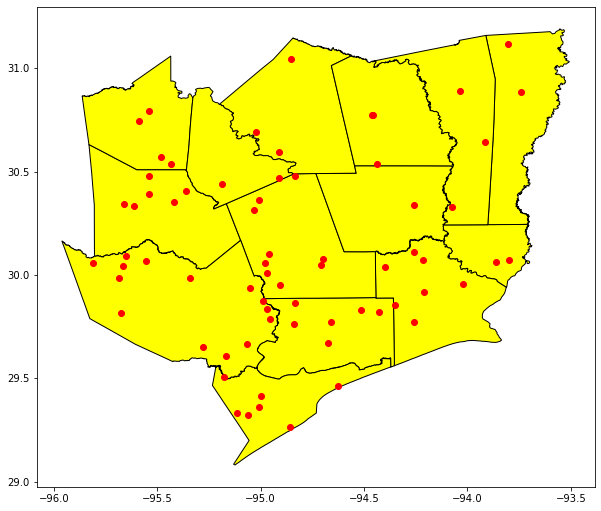

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
county.plot(ax=ax,color='yellow',edgecolor='black')
air_result.plot(ax=ax,color='r')

<h2>relational railways data</h2>

In [ ]:
cur.execute("""drop table rail1""")
cur.execute("""drop table rail2""")

In [34]:
c1 = """CREATE TABLE rail1 (
ID INTEGER AUTO_INCREMENT PRIMARY KEY,
RR_NBR integer,
RR_COMPANY text,
RR_ABRVN text,
CNTY_NM text,
geometry geometry
);"""
cur.execute(c1)

In [35]:
cur.execute("""CREATE TABLE rail2 (
UID INTEGER AUTO_INCREMENT PRIMARY KEY,
ID INTEGER,
RR_STATUS text,
FIPS_ST_CN INTEGER,
RR_NBR FLOAT,
FOREIGN KEY (ID) REFERENCES rail1(ID) 
);""")

In [36]:
cur.execute("""INSERT INTO rail1(RR_NBR, RR_COMPANY, RR_ABRVN, CNTY_NM, geometry)
SELECT RR_NBR, RR_COMPANY, RR_ABRVN, CNTY_NM, geometry FROM railway;""")
cur.execute("""INSERT INTO rail2(RR_STATUS, FIPS_ST_CN, RR_NBR)
SELECT RR_STATUS, FIPS_ST_CN, RR_NBR FROM railway;""")

In [37]:
for row in cur.execute('SELECT geometry, CNTY_NM FROM rail1 where RR_COMPANY = "BNSF Railway Company" '):
    print(row)

('LINESTRING (-93.95135299199995 30.452658143000065, -93.95098289999999 30.452928001000032, -93.95057592899997 30.453199709000046, -93.95031518599995 30.453388533000066, -93.94998812299997 30.45364247400005, -93.94993007399995 30.453707981000036, -93.94988488099995 30.453766916000063, -93.94984751099997 30.453833403000033, -93.94950144799998 30.45465049300003, -93.94869388799998 30.45666720500003)', 'Jasper')
('LINESTRING (-93.95079898799997 30.453050785000073, -93.95029677499997 30.453351731000055, -93.94999542999994 30.45359252000003, -93.94992061499994 30.45366082700008, -93.94985820699998 30.453729723000038, -93.94981669199996 30.453796014000034, -93.94967341499995 30.45409459800004, -93.94864472199998 30.456657691000032)', 'Jasper')
('LINESTRING (-93.92639489799996 30.535901102000025, -93.92663671199995 30.535393312000053, -93.92778652899995 30.531732375000047, -93.92920366199996 30.527219890000026, -93.92928421999994 30.52673510900007)', 'Jasper')
('LINESTRING (-93.90624379699995

In [38]:
result_rail = pd.read_sql('SELECT geometry, CNTY_NM FROM rail1 where RR_COMPANY = "BNSF Railway Company"',connection)
#make dataframe of query

In [39]:
result_rail

,geometry,CNTY_NM
0,LINESTRING (-93.95135299199995 30.452658143000...,Jasper
1,LINESTRING (-93.95079898799997 30.453050785000...,Jasper
2,LINESTRING (-93.92639489799996 30.535901102000...,Jasper
3,LINESTRING (-93.90624379699995 30.598982635000...,Jasper
4,LINESTRING (-93.90327653499997 30.608396037000...,Jasper
...,...,...
244,LINESTRING (-94.81130806599998 29.301443279000...,Galveston
245,LINESTRING (-94.81362231099996 29.300531959000...,Galveston
246,LINESTRING (-94.81103412099998 29.302052235000...,Galveston
247,LINESTRING (-94.81202302299994 29.302378358000...,Galveston


In [40]:
result_rail['geometry'] = pgd.GeoSeries.from_wkt(result_rail['geometry'])


In [41]:
rail_result = pgd.GeoDataFrame(result_rail)
rail_result

,geometry,CNTY_NM
0,"LINESTRING (-93.95135 30.45266, -93.95098 30.4...",Jasper
1,"LINESTRING (-93.95080 30.45305, -93.95030 30.4...",Jasper
2,"LINESTRING (-93.92639 30.53590, -93.92664 30.5...",Jasper
3,"LINESTRING (-93.90624 30.59898, -93.90634 30.5...",Jasper
4,"LINESTRING (-93.90328 30.60840, -93.90362 30.6...",Jasper
...,...,...
244,"LINESTRING (-94.81131 29.30144, -94.81455 29.3...",Galveston
245,"LINESTRING (-94.81362 29.30053, -94.81342 29.3...",Galveston
246,"LINESTRING (-94.81103 29.30205, -94.81390 29.3...",Galveston
247,"LINESTRING (-94.81202 29.30238, -94.81230 29.3...",Galveston


<AxesSubplot:>

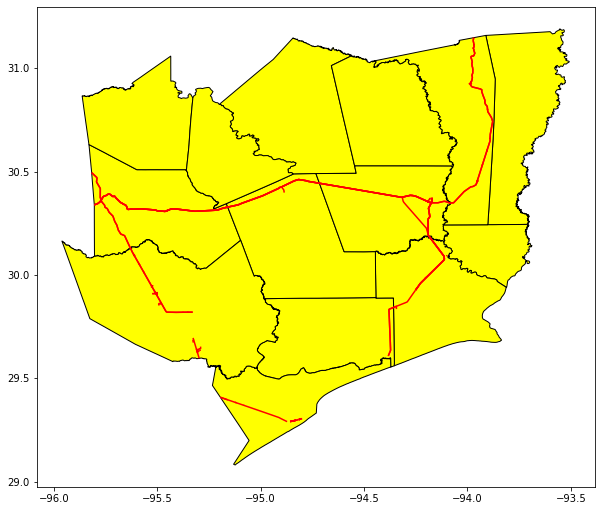

In [42]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
county.plot(ax=ax,color='yellow',edgecolor='black')
rail_result.plot(ax=ax,color='r')